# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
"Identify key factors that influence the price of used cars. "

In [ ]:
"This will help the dealership optimize its inventory by focusing on vehicles that consumers value more."

In [ ]:
"What are the primary features of a car that affect its price?"

In [ ]:
"How can the dealership use these insights to improve sales and customer satisfaction?"

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
"Goal: Explore the dataset to understand its structure, the variables it contains, and any preliminary patterns."

In [ ]:
"Steps:"
"1. Load the dataset."
"2. Perform a quick summary and check the data types."
"3. Identify key variables related to car pricing (e.g., mileage, age, brand, model, etc.)."
"4. Look for missing values, outliers, and other data quality issues."

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')
# Display the first few rows and summary of the dataset
vehicles_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
vehicles_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
"Missing Values: Several columns have significant missing data. For instance, condition, cylinders, drive, size, type, and paint_color "
"have large proportions of missing values."

In [ ]:
"Outliers: The price column contains values ranging from 0 to over $3.7 billion, indicating possible outliers or incorrect data."

In [ ]:
"Data Types: The year and odometer columns are numeric, while most others are categorical."

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
"Create derived features if beneficial (e.g., car age from year)."
"Default the missing data"

In [9]:
# Data Cleaning
vehicles_df = vehicles_df[vehicles_df['price'] > 0]
vehicles_df.dropna(subset=['year', 'odometer', 'manufacturer'], inplace=True)
vehicles_df = vehicles_df[vehicles_df['price'] < vehicles_df['price'].quantile(0.99)]
vehicles_df['condition'].fillna('Unknown', inplace=True)
vehicles_df['cylinders'].fillna('Unknown', inplace=True)
vehicles_df['fuel'].fillna('Unknown', inplace=True)
vehicles_df['title_status'].fillna('Unknown', inplace=True)
vehicles_df['transmission'].fillna('Unknown', inplace=True)
vehicles_df['drive'].fillna('Unknown', inplace=True)
vehicles_df['size'].fillna('Unknown', inplace=True)
vehicles_df['type'].fillna('Unknown', inplace=True)
vehicles_df['paint_color'].fillna('Unknown', inplace=True)

In [11]:
# Feature Engineering: Calculate car age and drop the 'year' column
vehicles_df['car_age'] = 2024 - vehicles_df['year']
vehicles_df.drop(columns=['year'], inplace=True)

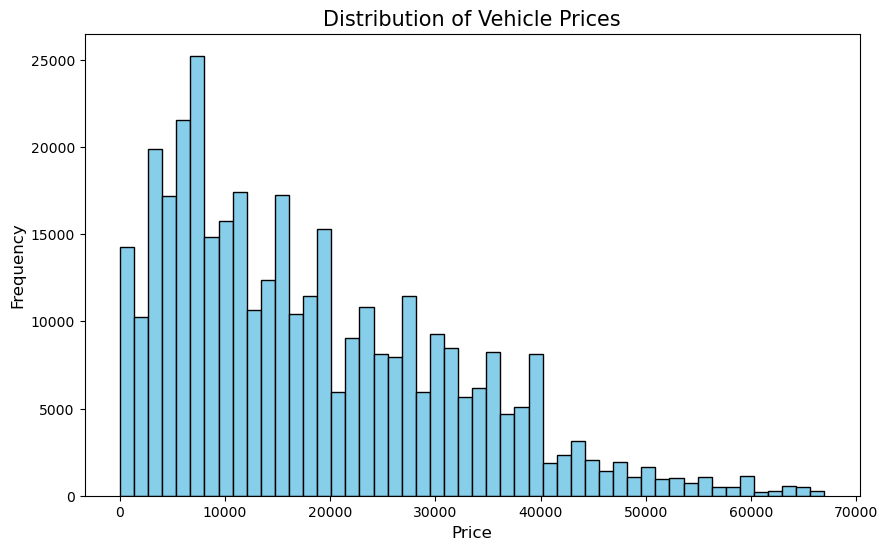

In [13]:
# Plotting the distribution of the 'price' column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Prices', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

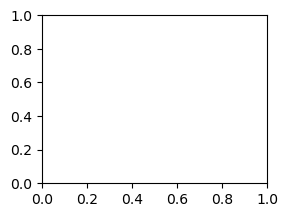

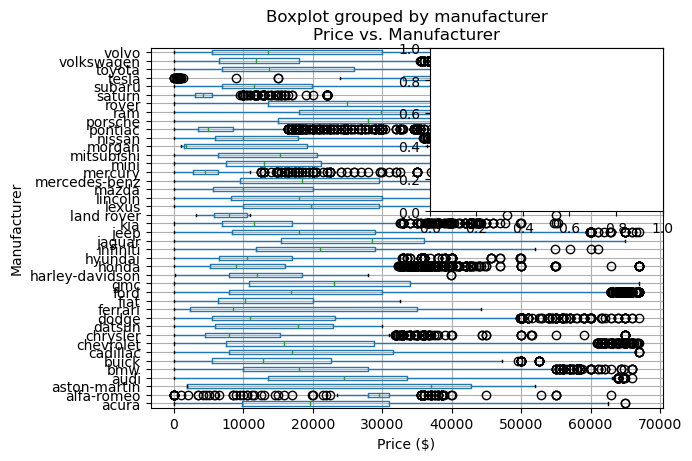

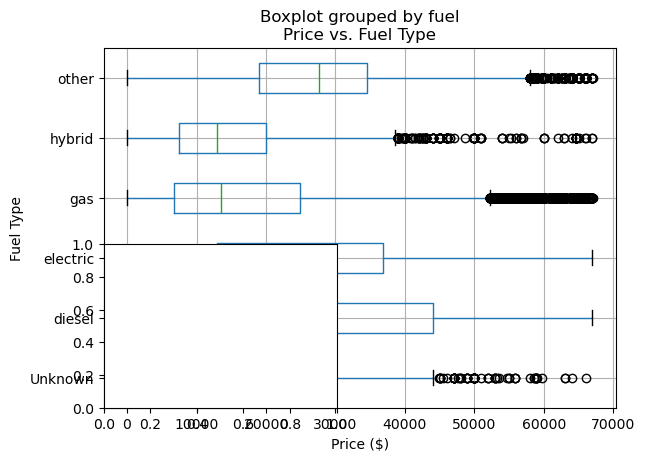

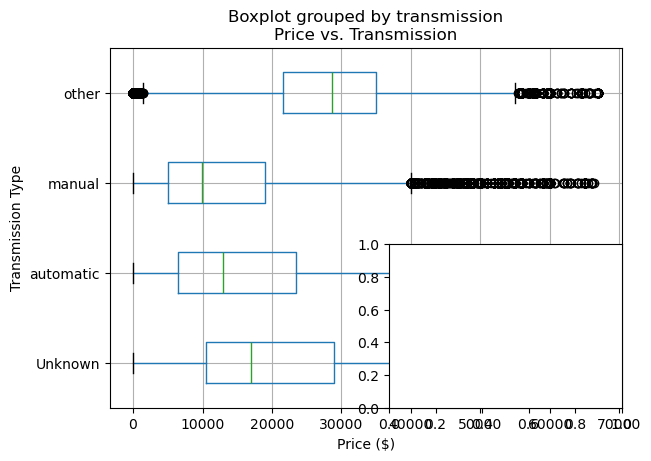

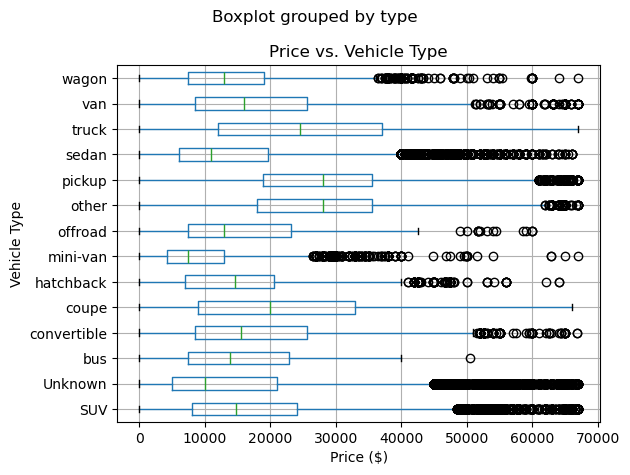

In [15]:
# Box plot for manufacturer vs. price
plt.subplot(2, 2, 1)
vehicles_df.boxplot(column='price', by='manufacturer', vert=False)
plt.title('Price vs. Manufacturer')
plt.xlabel('Price ($)')
plt.ylabel('Manufacturer')

# Box plot for fuel vs. price
plt.subplot(2, 2, 2)
vehicles_df.boxplot(column='price', by='fuel', vert=False)
plt.title('Price vs. Fuel Type')
plt.xlabel('Price ($)')
plt.ylabel('Fuel Type')

# Box plot for transmission vs. price
plt.subplot(2, 2, 3)
vehicles_df.boxplot(column='price', by='transmission', vert=False)
plt.title('Price vs. Transmission')
plt.xlabel('Price ($)')
plt.ylabel('Transmission Type')

# Box plot for type vs. price
plt.subplot(2, 2, 4)
vehicles_df.boxplot(column='price', by='type', vert=False)
plt.title('Price vs. Vehicle Type')
plt.xlabel('Price ($)')
plt.ylabel('Vehicle Type')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price ($)')

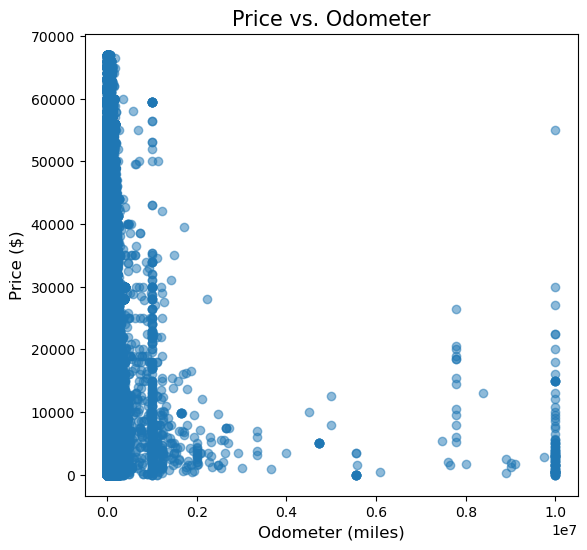

In [17]:
# Scatter plot for price vs. odometer
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(vehicles_df['odometer'], vehicles_df['price'], alpha=0.5)
plt.title('Price vs. Odometer', fontsize=15)
plt.xlabel('Odometer (miles)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
"Feature Engineering:"

"Convert the year column to car_age by subtracting it from the current year (assuming 2024).
"Convert categorical variables to numerical format using one-hot encoding or label encoding.

"Modeling:"
"Build and evaluate models (e.g., Linear Regression, Decision Trees) to identify the most significant factors influencing car prices."

In [19]:

# Define categorical and numerical columns
categorical_cols = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 
                    'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'region']
numerical_cols = ['odometer', 'car_age']

In [21]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [23]:
# Prepare features (X) and target variable (y)
X = vehicles_df.drop(columns=['price', 'id', 'model', 'VIN'])
y = vehicles_df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge()
}

In [29]:

# Model evaluation
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=2, scoring='r2')
    print(f"{name} CV R^2 score: {cv_scores.mean():.4f}")
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test R^2 score: {r2:.4f}, MSE: {mse:.4f}")

Linear Regression CV R^2 score: 0.4892
Linear Regression Test R^2 score: 0.4945, MSE: 90489430.8688
Ridge CV R^2 score: 0.4894
Ridge Test R^2 score: 0.4945, MSE: 90489048.7041


In [31]:
# Hyperparameter tuning for Ridge and Lasso
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0]
}
# Ridge
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge())])
ridge_search = GridSearchCV(ridge_pipeline, param_grid, cv=2, scoring='r2')
ridge_search.fit(X_train, y_train)
print(f"Best Ridge CV R^2 score: {ridge_search.best_score_:.4f}")
print(f"Best Ridge alpha: {ridge_search.best_params_['model__alpha']}")

Best Ridge CV R^2 score: 0.4897
Best Ridge alpha: 10.0


In [ ]:

# Lasso
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Lasso())])
lasso_search = GridSearchCV(lasso_pipeline, param_grid, cv=2, scoring='r2')
lasso_search.fit(X_train, y_train)
print(f"Best Lasso CV R^2 score: {lasso_search.best_score_:.4f}")
print(f"Best Lasso alpha: {lasso_search.best_params_['model__alpha']}")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
"Vehicle Age is a Primary Driver of Price"

In [ ]:
"Manufacturer Significantly Influences Price"

In [ ]:
"Odometer Reading is Critical"

In [ ]:
"Condition Matters"

Best Ridge CV R^2 score: 0.4903
Best Ridge alpha: 10.0
